<a href="https://colab.research.google.com/github/tanish-garg-1/clustering/blob/main/ml_clusterring_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(url, header=None, names=columns)
data = data.drop('class', axis=1)  # Drop the class column for clustering purposes


In [ ]:
# Standardization
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(data)


In [ ]:
pca = PCA(n_components=2)
data_std_pca = pca.fit_transform(data_std)
data_minmax_pca = pca.fit_transform(data_minmax)


In [ ]:
def cluster_and_evaluate(data, n_clusters=3):
    results = []

    # K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels_kmeans = kmeans.fit_predict(data)
    results.append(('K-Means', labels_kmeans))

    # DBSCAN
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    labels_dbscan = dbscan.fit_predict(data)
    results.append(('DBSCAN', labels_dbscan))

    # Agglomerative Clustering
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels_agglomerative = agglomerative.fit_predict(data)
    results.append(('Agglomerative', labels_agglomerative))

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    labels_gmm = gmm.fit_predict(data)
    results.append(('Gaussian Mixture', labels_gmm))

    # Evaluate
    for name, labels in results:
        if len(set(labels)) > 1:  # Check to ensure there are multiple clusters
            silhouette = silhouette_score(data, labels)
            ch_score = calinski_harabasz_score(data, labels)
            db_score = davies_bouldin_score(data, labels)
            print(f"{name} - Silhouette Score: {silhouette:.4f}, Calinski-Harabasz Score: {ch_score:.4f}, Davies-Bouldin Score: {db_score:.4f}")
        else:
            print(f"{name} - Only one cluster detected")


In [ ]:
print("Results for Standardized Data:")
cluster_and_evaluate(data_std)

print("\nResults for Min-Max Scaled Data:")
cluster_and_evaluate(data_minmax)


Results for Standardized Data:
K-Means - Silhouette Score: 0.4787, Calinski-Harabasz Score: 156.1430, Davies-Bouldin Score: 0.7868
DBSCAN - Silhouette Score: 0.3492, Calinski-Harabasz Score: 76.9759, Davies-Bouldin Score: 6.1608
Agglomerative - Silhouette Score: 0.4455, Calinski-Harabasz Score: 220.2604, Davies-Bouldin Score: 0.8059
Gaussian Mixture - Silhouette Score: 0.4092, Calinski-Harabasz Score: 133.7028, Davies-Bouldin Score: 0.8669

Results for Min-Max Scaled Data:
K-Means - Silhouette Score: 0.4825, Calinski-Harabasz Score: 350.0614, Davies-Bouldin Score: 0.7875
DBSCAN - Only one cluster detected
Agglomerative - Silhouette Score: 0.5043, Calinski-Harabasz Score: 348.0310, Davies-Bouldin Score: 0.7486
Gaussian Mixture - Silhouette Score: 0.4508, Calinski-Harabasz Score: 307.7613, Davies-Bouldin Score: 0.8726


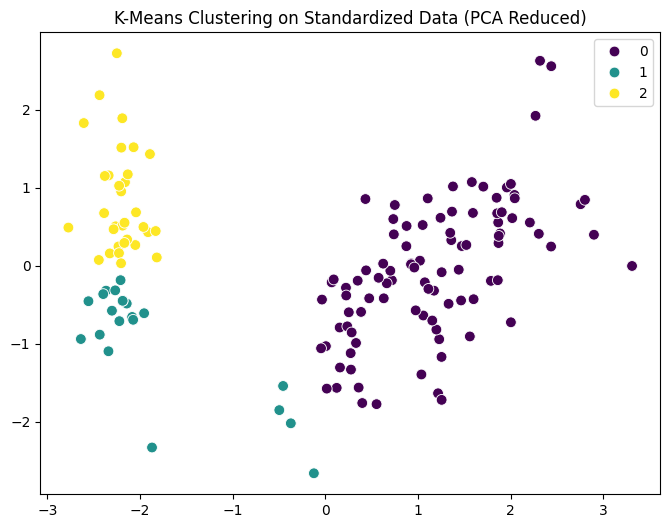

In [ ]:
def visualize_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels, palette="viridis", s=60)
    plt.title(title)
    plt.show()

# Example for Standardized Data with K-Means
kmeans_std = KMeans(n_clusters=3, random_state=42)
labels_kmeans_std = kmeans_std.fit_predict(data_std_pca)
visualize_clusters(data_std_pca, labels_kmeans_std, "K-Means Clustering on Standardized Data (PCA Reduced)")
